# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Robby Saidi Prasetyo]
- **Email:** [robbysaidiii@gmail.com]
- **ID Dicoding:** [mc211d5y2136]

## Menentukan Pertanyaan Bisnis

- Seberapa besar dampak cuaca terhadap jumlah penyewaan sepeda?
- bagaimana penyewaan sepeda setiap bulan nya

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

`Data Day`

In [3]:
day=pd.read_csv('/content/drive/MyDrive/Dicoding_DBS/Bike-sharing-dataset/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


`Data HOUR`

In [4]:
HOUR=pd.read_csv('/content/drive/MyDrive/Dicoding_DBS/Bike-sharing-dataset/hour.csv')
HOUR.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day menampilkan 5 baris diawal dan menampilkn 9 variabel
- Hour menampilkan 5 baris diawal dan menampilkn 9 variabel

### Assessing Data

`day info`

In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [14]:
print("Jumlah duplikasi: ", day.duplicated().sum())
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


`hour info`

In [15]:
HOUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
HOUR.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [17]:
print("Jumlah duplikasi: ", HOUR.duplicated().sum())
HOUR.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- day menampilkan semua variabel berserta tipe datanya dan mencari nilai yang hilang (NAN), mencari nilai yang terduplikat disemua colom bisa kita semua terlihat norma tidak ada missing value dan nilai yng terduplikat di semua kolom
- HOUR menampilkan semua variabel berserta tipe datanya dan mencari nilai yang hilang (NAN), mencari nilai yang terduplikat disemua colom bisa kita semua terlihat norma tidak ada missing value dan nilai yng terduplikat di semua kolom

### Cleaning Data

##### Duplicate data


In [18]:
# didalam dataset HOUR tidak ada data yang terduplikat
HOUR.duplicated().sum()


0

In [19]:
# didalam dataset day tidak ada data yang terduplikat
day.duplicated().sum()

0

In [20]:
### didalam 2 dataset ridak ada data yang terduplikat, saya harus tetep menghilangkn data yang terduplikat karna ini penting bagian dari cleaning data
day.drop_duplicates(inplace=True)
HOUR.drop_duplicates(inplace=True)

In [21]:
print("Jumlah duplikasi dataset HOUR: ", HOUR.duplicated().sum())
print("Jumlah duplikasi dataset day: ", day.duplicated().sum())

Jumlah duplikasi dataset HOUR:  0
Jumlah duplikasi dataset day:  0


##### Missing values

In [22]:
#dalam dataset day tidak ada nilai yang hilang
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [23]:
HOUR.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0



**karna** tidak ada missing value maka langsung masuk ketahap Inaccurate value




##### Inaccurate value

`mencari data yang tidak masuk akal di dalam data day`

In [24]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [25]:
max=day.max()
min=day.min()
result = pd.DataFrame({"Min": min, "Max": max})
print(result)

                   Min         Max
instant              1         731
dteday      2011-01-01  2012-12-31
season               1           4
yr                   0           1
mnth                 1          12
holiday              0           1
weekday              0           6
workingday           0           1
weathersit           1           3
temp           0.05913    0.861667
atemp          0.07907    0.840896
hum                0.0      0.9725
windspeed     0.022392    0.507463
casual               2        3410
registered          20        6946
cnt                 22        8714


data pada datset day.csv setiap kolom terlihat norma tidak ada nilai yag yang tidak masuk akal di data maximum dan minimum

`mencari data yang tidak masuk akal di dalam data HOUR`

In [26]:
HOUR.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [27]:
max=day.max()
min=day.min()
result = pd.DataFrame({"Min": min, "Max": max})
print(result)

                   Min         Max
instant              1         731
dteday      2011-01-01  2012-12-31
season               1           4
yr                   0           1
mnth                 1          12
holiday              0           1
weekday              0           6
workingday           0           1
weathersit           1           3
temp           0.05913    0.861667
atemp          0.07907    0.840896
hum                0.0      0.9725
windspeed     0.022392    0.507463
casual               2        3410
registered          20        6946
cnt                 22        8714


data pada datset hour.csv setiap kolom terlihat norma tidak ada nilai yag yang tidak masuk akal di data maximum dan minimum

## Exploratory Data Analysis (EDA)

### Explore `day`

In [28]:
day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
150,151,2011-05-31,2,0,5,0,2,1,1,0.775000,0.725383,0.636667,0.111329,673,3309,3982
532,533,2012-06-16,2,1,6,0,6,0,1,0.631667,0.594708,0.504167,0.166667,2963,4739,7702
177,178,2011-06-27,3,0,6,0,1,1,2,0.682500,0.637004,0.658333,0.107588,854,3854,4708
317,318,2011-11-14,4,0,11,0,1,1,1,0.530000,0.524612,0.587083,0.306596,595,3891,4486
91,92,2011-04-02,2,0,4,0,6,0,2,0.315000,0.315637,0.653750,0.197146,898,1354,2252


mengambil 5 baris acak dari DataFrame day untuk meliat sample

In [29]:
day.describe(include="object")

,dteday
count,731
unique,731
top,2011-01-01
freq,1


- count: memiliki semua panjang 731 dan semua terisi  nilai
- unique: memiliki nilai 731 nilai dan semua nya terisi nilai
- top:memiliki tanggal yang berbeda setiap baris nya
- freq: memunculkan nilai yang modulus

In [30]:
day.instant.is_unique
day.dteday.is_unique

True

didalam instant memiliki nilai yang unik dan dtday juga mempunyai nilai yang unik

In [31]:
day.groupby(by="mnth").agg({
    "dteday": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

dteday      temp                              
     nunique       max       min      mean       std
mnth                                                
1         62  0.425000  0.059130  0.236444  0.083266
2         57  0.521667  0.127500  0.299226  0.084314
3         62  0.601667  0.198333  0.390539  0.104674
4         60  0.664167  0.300000  0.469999  0.087255
5         62  0.775000  0.414167  0.594798  0.072999
6         60  0.834167  0.540833  0.684097  0.066094
7         62  0.861667  0.595833  0.755470  0.051950
8         62  0.793333  0.635833  0.708582  0.039913
9         60  0.753333  0.469167  0.616485  0.061916
10        62  0.657500  0.254167  0.485012  0.084009
11        60  0.530000  0.245833  0.369220  0.064527
12        62  0.475833  0.215833  0.324031  0.067852

mengelompokkan data berdasarkan kolom mnth (bulan) dan suhu
bisa kita lihat bulan temperatur suhu nilai unik max suhu, min dari suhu, rata" suhu dan standart suhu

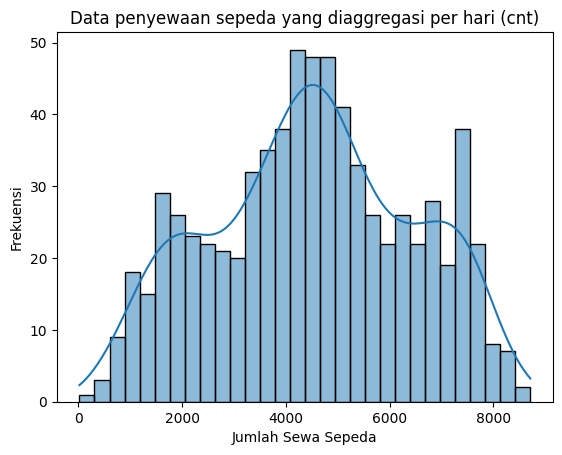

In [32]:
# Distribusi jumlah sewa sepeda (cnt)
sn.histplot(day['cnt'], bins=30, kde=True)
plt.title('Data penyewaan sepeda yang diaggregasi per hari (cnt)')
plt.xlabel('Jumlah Sewa Sepeda')
plt.ylabel('Frekuensi')
plt.show()

Distribusi jumlah penyewaan sepeda menunjukkan pola mendekati normal dengan beberapa variasi. Mayoritas penyewaan terjadi dalam rentang 3000–5000 sepeda per periode, tetapi ada beberapa variasi yang mungkin dipengaruhi oleh faktor eksternal seperti cuaca, musim, atau hari dalam seminggu.









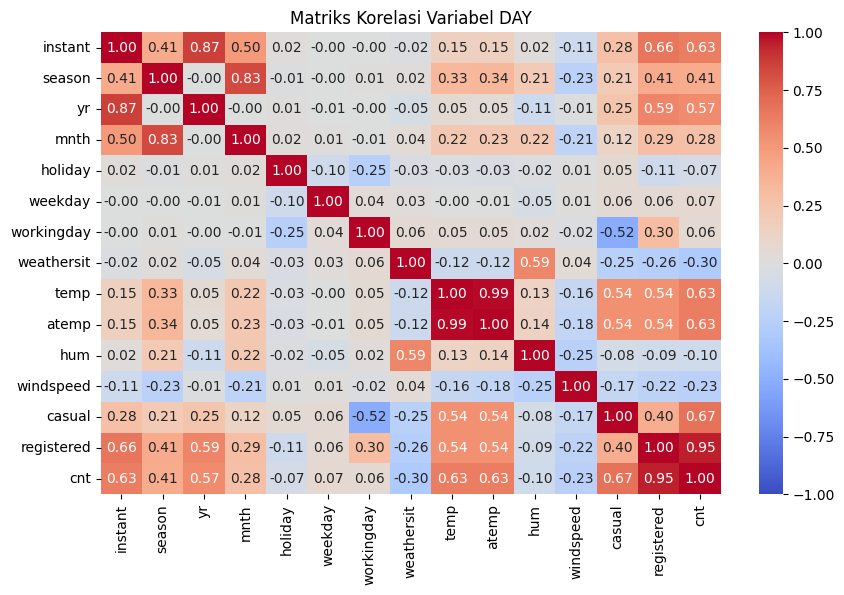

In [33]:
numerical_columns = day.select_dtypes(include=['number']).columns
correlation_matrix = day[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(10, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=ax)
ax.set_title("Matriks Korelasi Variabel DAY")
plt.show()

ini adalah heatmap korelasi hubungan antara variabel

### Explore `Hour`

In [34]:
HOUR.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9648,9649,2012-02-11,1,1,2,23,0,6,0,3,0.12,0.0758,0.50,0.4925,0,20,20
1912,1913,2011-03-25,2,0,3,11,0,5,1,1,0.30,0.2879,0.45,0.2836,17,58,75
14598,14599,2012-09-05,3,1,9,11,0,3,1,2,0.78,0.7424,0.62,0.1642,61,156,217
3893,3894,2011-06-16,2,0,6,3,0,4,1,2,0.56,0.5303,0.73,0.0896,0,4,4
13567,13568,2012-07-24,3,1,7,12,0,2,1,2,0.82,0.7879,0.56,0.2239,60,169,229


In [35]:
HOUR.describe(include="object")

,dteday
count,17379
unique,731
top,2011-01-01
freq,24


- count: memiliki semua panjang 17379 dan semua terisi  nilai
- unique: memiliki nilai 731 nilai dan semua nya terisi nilai
- top:memiliki tanggal yang berbeda setiap baris nya
- freq: memunculkan nilai yang modulus sekitar 24

In [36]:
day.instant.is_unique
day.dteday.is_unique

True

didalam instant memiliki nilai yang unik dan dtday juga mempunyai nilai yang unik

In [37]:
HOUR.groupby(by="mnth").agg({
    "dteday": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

dteday  temp                          
     nunique   max   min      mean       std
mnth                                        
1         62  0.58  0.02  0.237649  0.099911
2         57  0.66  0.06  0.300209  0.104399
3         62  0.72  0.12  0.390903  0.122724
4         60  0.80  0.24  0.470021  0.112796
5         62  0.90  0.34  0.594798  0.097153
6         60  0.98  0.46  0.684097  0.094641
7         62  1.00  0.58  0.755470  0.082907
8         62  0.92  0.52  0.708705  0.072138
9         60  0.86  0.38  0.616507  0.081386
10        62  0.74  0.22  0.487181  0.100936
11        60  0.64  0.20  0.369200  0.088215
12        62  0.60  0.14  0.324167  0.084161

mengelompokkan data berdasarkan kolom mnth (bulan) dan suhu bisa kita lihat bulan temperatur suhu nilai unik max suhu, min dari suhu, rata" suhu dan standart suhu

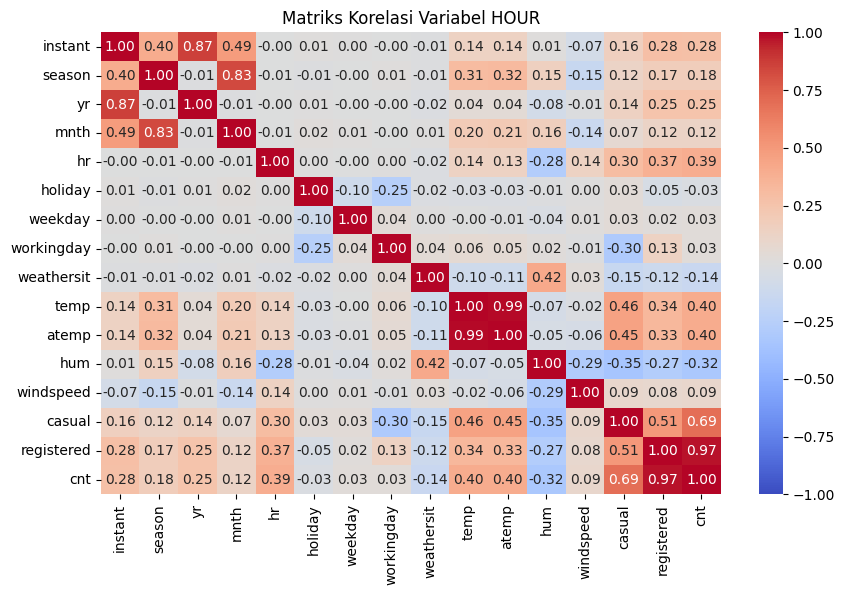

In [38]:
numerical_columns = HOUR.select_dtypes(include=['number']).columns
correlation_matrix = HOUR[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(10, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, ax=ax)
ax.set_title("Matriks Korelasi Variabel HOUR")
plt.show()

menampilkan hasil hubungan korelasi anatara variabel

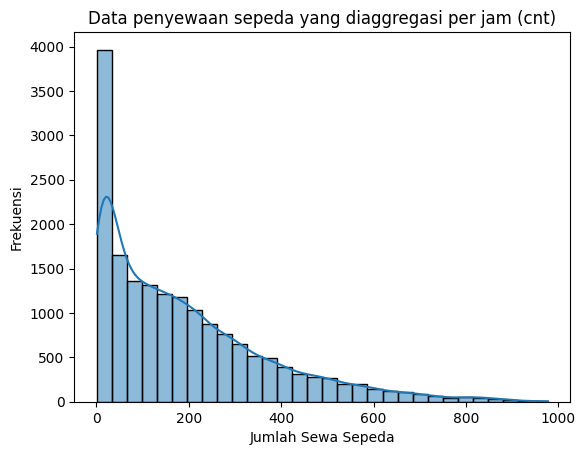

In [39]:
sn.histplot(HOUR['cnt'], bins=30, kde=True)
plt.title('Data penyewaan sepeda yang diaggregasi per jam (cnt)')
plt.xlabel('Jumlah Sewa Sepeda')
plt.ylabel('Frekuensi')
plt.show()

kita lihat digambar ini yang menunnjukan data penyewaan sepeda per jam nya
- contoh 200 jam sepeda yang disewa 1000 jam lebih yang arti nya banyak penyewa sepeda yang mencapai 1000 jam

### Explore menggabungkan hour dan day


In [40]:
HOUR["dteday"] = pd.to_datetime(HOUR["dteday"])
day["dteday"] = pd.to_datetime(day["dteday"])

Hour_day_df = pd.merge(
    left=HOUR,
    right=day,
    how="left",
    on="dteday")
Hour_day_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**
ini adalah penggabungan 2 dataser yang sudah dibersihkan dari missing value dan duplikat. penggabugan dataset ini disimpan didalam HOUR_day_df, kiri untuk HOUR dan kanan untuk day

In [41]:
Hour_day_df.columns = Hour_day_df.columns.str.strip()

result = Hour_day_df.groupby(["workingday_x", "weathersit_x"]).agg({
    "instant_x": "nunique",
    "casual_y": "sum",
    "registered_y": "sum",
    "cnt_y": "sum"
}).reset_index
print(result)

<bound method DataFrame.reset_index of                            instant_x  casual_y  registered_y     cnt_y
workingday_x weathersit_x                                             
0            1                  3781   5629399      11744681  17374080
             2                  1353   1620168       3755155   5375323
             3                   379    333161        857008   1190169
             4                     1        67          1234      1301
1            1                  7632   5171091      32292843  37463934
             2                  3191   1715500      12220599  13936099
             3                  1040    378044       3069218   3447262
             4                     2       140          2742      2882>


Kelompokkan data berdasarkan hari kerja (workingday_x) dan kondisi cuaca (weathersit_x).

In [42]:

Hour_day_df.columns = Hour_day_df.columns.str.strip()
result = Hour_day_df.groupby(["workingday_x", "weathersit_x"]).agg({
    "instant_x": "nunique",
    "casual_y": "sum",
    "registered_y": "sum",
    "cnt_y": "sum"
}).sort_values(by="cnt_y", ascending=False)

mengurutkan hasil dari cnt_y dari terbesar hingga terkecil

In [43]:
Hour_day_df.to_csv("Hour_day_df.csv", index=False)

dari 2 datset jadikan satu disimpan didalam variabel Hour_day_df dilatih dan simpan di dalam csv

## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana penyewaaan sepeda setiap bulan nya?

In [44]:
Hour_day_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
9288,9289,2012-01-27,1,1,1,22,0,5,1,1,...,5,1,2,0.425000,0.415383,0.741250,0.342667,269,3187,3456
9625,9626,2012-02-11,1,1,2,0,0,6,0,2,...,6,0,3,0.224167,0.210867,0.731250,0.289796,192,1977,2169
5277,5278,2011-08-12,3,0,8,19,0,5,1,1,...,5,1,1,0.708333,0.654042,0.415000,0.125621,1051,3854,4905
16213,16214,2012-11-13,4,1,11,7,0,2,1,3,...,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094
16308,16309,2012-11-17,4,1,11,6,0,6,0,1,...,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629


In [45]:

monthly_orders_df = Hour_day_df.resample(rule='M', on='dteday').agg({
    "cnt_y": "sum",
    "casual_y": "sum",
    "registered_y": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "dteday": "Bulan",
    "cnt_y": "Total Penyewaan",
    "casual_y": "Penyewaan Casual",
    "registered_y": "Penyewaan Terdaftar"
}, inplace=True)

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
monthly_orders_df["Bulan"] = pd.Categorical(monthly_orders_df["Bulan"], categories=month_order, ordered=True)

monthly_orders_df = monthly_orders_df.sort_values("Bulan")

monthly_orders_df.head()


<ipython-input-45-d6bf0a753849>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = Hour_day_df.resample(rule='M', on='dteday').agg({


,Bulan,Total Penyewaan,Penyewaan Casual,Penyewaan Terdaftar
0,January,870969,71251,799718
12,January,2313372,214712,2098660
1,February,1119397,146161,973236
13,February,2462764,208368,2254396
2,March,1511511,302994,1208517


bulan muncul 2 kali karna ada dijadikan satu beberapa tahun, ini bukan duplikat , data yang paling tinggi dibulan febuary

    mnth          cnt
0      1  2176.338710
1      2  2655.298246
2      3  3692.258065
3      4  4484.900000
4      5  5349.774194
5      6  5772.366667
6      7  5563.677419
7      8  5664.419355
8      9  5766.516667
9     10  5199.225806
10    11  4247.183333
11    12  3403.806452


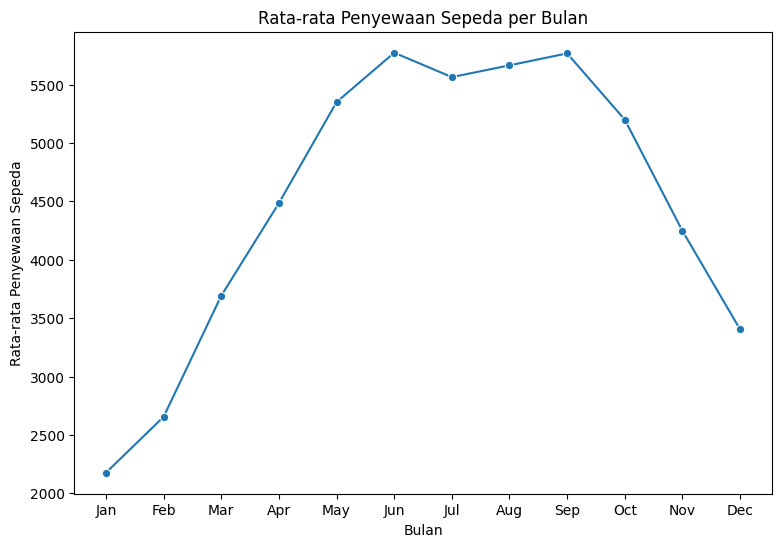

In [46]:
monthly_rentals = day.groupby('mnth')['cnt'].mean().reset_index()
print(monthly_rentals)

plt.figure(figsize=(9, 6))
sn.lineplot(x='mnth', y='cnt', data=monthly_rentals, marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Insight:

Penyewaan sepeda cenderung meningkat selama blan-bulan musim panas Juni, Juli, Agustus dan menurun selama bulan-bulan musim dingin Desember, Januari, Februari.

Bulan Juni miliki rata-rata penyewaan sepeda tertinggi, sementara bulan Desember memiliki rata-rata penyewaan sepeda terendah.

### Pertanyaan 2:Seberapa besar dampak cuaca terhadap jumlah penyewaan sepeda?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [47]:
weather_impact = Hour_day_df.groupby("weathersit_x").agg({
    "cnt_y": ["sum", "mean", "count"]
}).reset_index()

weather_impact.columns = ["Cuaca", "Total Penyewaan", "Rata-rata Penyewaan", "Jumlah Hari"]

weather_labels = {
    1: "Cerah",
    2: "Mendung",
    3: "Gerimis",
    4: "Hujan Lebat"
}
weather_impact["Cuaca"] = weather_impact["Cuaca"].map(weather_labels)
weather_impact.head()

,Cuaca,Total Penyewaan,Rata-rata Penyewaan,Jumlah Hari
0,Cerah,54838014,4804.872864,11413
1,Mendung,19311422,4249.872799,4544
2,Gerimis,4637431,3268.097956,1419
3,Hujan Lebat,4183,1394.333333,3


ini adalah rata" penyewaan sepeda pada cuaca bisa dilihat dari hasil nya cerah yang tertinggi yang berarti dihari yang cerah banyak yang menyewa sepeda

<ipython-input-48-53082d605d6a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=weather_impact, x="Cuaca", y="Total Penyewaan", palette="coolwarm")


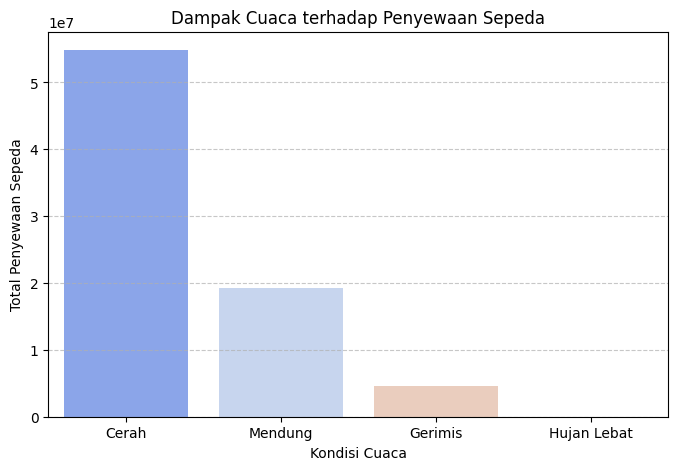

In [48]:
weather_impact = Hour_day_df.groupby("weathersit_x").agg({
    "cnt_y": ["sum", "mean", "count"]
}).reset_index()

weather_impact.columns = ["Cuaca", "Total Penyewaan", "Rata-rata Penyewaan", "Jumlah Hari"]

weather_labels = {
    1: "Cerah",
    2: "Mendung",
    3: "Gerimis",
    4: "Hujan Lebat"
}
weather_impact["Cuaca"] = weather_impact["Cuaca"].map(weather_labels)
# --- End of copied code ---


plt.figure(figsize=(8, 5))
sn.barplot(data=weather_impact, x="Cuaca", y="Total Penyewaan", palette="coolwarm")

plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Dampak Cuaca terhadap Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Insight:

cuaca sangat mempengaruhi penyewaan sepeda bisa dilihat dalam visualisai tersebut bahwa cuaca saat hujan tidak ada yang menyewa sepeda dan pada saat hujan ringan mendapatkan penyewaan sebesar 0,1 . dan dimendung mendapatkan angka di 1,8 yang berarti ada banyak penyewa sepeda di saat  mendung dan di cerah mendapatkan penyewaan sepeda yang lebih signifikan meningkat yaitu di angka 5
 kesimpulan: cuaca sangat mempengaruhi terhadap penyewaan sepeda

## Conclusion

*  cuaca sangat mempengaruhi penyewaan sepeda bisa dilihat dalam visualisai tersebut bahwa cuaca saat hujan tidak ada yang menyewa sepeda dan pada saat hujan ringan mendapatkan penyewaan sebesar 0,1 . dan dimendung mendapatkan angka di 1,8 yang berarti ada banyak penyewa sepeda di saat  mendung dan di cerah mendapatkan penyewaan sepeda yang lebih signifikan meningkat yaitu di angka 5
 kesimpulan: cuaca sangat mempengaruhi terhadap penyewaan sepeda
*   Tren penyewaan sepeda bervariasi setiap bulannya, dengan puncak penyewaan terjadi pada bulan-bulan musim panas (Juni, Juli, Agustus) dan penurunan pada bulan-bulan musim dingin (Desember, Januari, Februari). Bulan Juni adalah bulan dengan rata-rata penyewaan sepeda tertinggi.
